In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.50d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt


In [8]:
!nvidia-smi


Sun Jul 23 04:54:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    31W /  70W |  14060MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [9]:
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))


Number of devices: 2


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import warnings

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

In [13]:
pip install num2words


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 3.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install pydot 

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [16]:
from num2words import num2words
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from nltk.stem import SnowballStemmer

In [17]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Embedding, LSTM, Dropout, concatenate, Input, Dense
from tensorflow.keras.layers import Bidirectional, Attention, Reshape, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [19]:
from tqdm import tqdm
import gc

#warnings
import warnings
warnings.filterwarnings("ignore")

In [20]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [21]:
train_df = pd.read_csv('/kaggle/input/quora-question-pairs/train.csv.zip')

In [22]:
train_df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [23]:
test_df = pd.read_csv('/kaggle/input/quora-question-pairs/test.csv.zip')

In [24]:
train_df.shape

(404290, 6)

In [25]:
test_df.shape

(3563475, 3)

In [26]:
test_df

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...,...
3563470,2345791,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
3563471,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
3563472,2345793,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
3563473,2345794,What were the best and worst things about publ...,What are the best and worst things examination...


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [28]:
train_df.isna().sum()


id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [29]:
train_df.dropna(inplace=True)


In [30]:
train_df.isna().sum()


id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

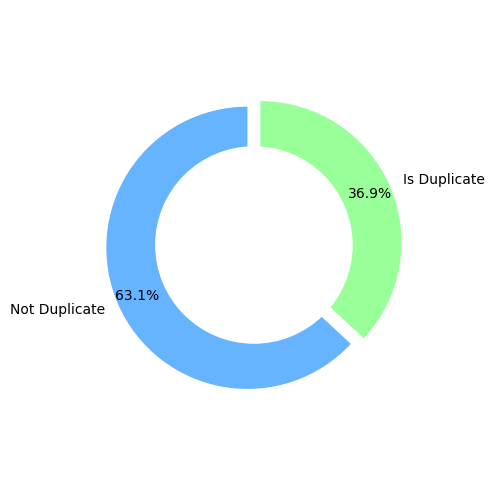

In [31]:
targets = train_df['is_duplicate'].value_counts()
labels = ['Not Duplicate', 'Is Duplicate']
sizes = targets.values.tolist()
colors = ['#66b3ff', '#99ff99']
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=(0.05, 0.05))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)
ax.axis('equal')
plt.tight_layout()
plt.show()


In [32]:
train_df ['question1'] = train_df ['question1'].apply(lambda x: x.lower())
train_df ['question2'] = train_df ['question2'].apply(lambda x: x.lower())


In [33]:
def replacements(text):

    text=text.replace('=', ' is equal to ')
    text=text.replace('%', ' percent ')
    text = text.replace('$', ' dollar ')
    text = text.replace('₹', ' rupee ')
    text = text.replace('€', ' euro ')
    text = text.replace('@', ' at ')
    text = text.replace('+', ' plus ')
    text = text.replace('/', ' or ')
    text = text.replace('-', ' ')
    text = text.replace('[math]', '')
    
    #replacement dict
    replacements_dict = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "can not",
        "can't've": "can not have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "I'd": "I would",
        "I'd've": "I would have",
        "I'll": "I will",
        "I'll've": "I will have",
        "I'm": "I am",
        "I've": "I have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so is",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have",
    }

    # Apply replacements
    pattern = re.compile(r'\b(' + '|'.join(replacements_dict.keys()) + r')\b')
    text = pattern.sub(lambda x: replacements_dict[x.group()], text)

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    return text

In [34]:
train_df ['question1'] = train_df ['question1'].apply(lambda x: replacements(x))
train_df ['question2'] = train_df ['question2'].apply(lambda x: replacements(x))

In [35]:
train_df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 2324 or math is divide...,0
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0
...,...,...,...,...,...,...
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0
404286,404286,18840,155606,do you believe there is life after death,is it true that there is life after death,1
404287,404287,537928,537929,what is one coin,what is this coin,0
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0


In [36]:
def num_to_words(text):
  #converting numbers to words
  words = text.split()
  converted_text = []
  for word in words:
        
        if re.match(r'^-?\d+\.?\d*$', word): 
            # Check if the word is a numeric value
              try:
                converted_word = num2words(float(word))
                converted_text.append(converted_word)
              except ValueError:
                  converted_text.append(word)  # If conversion fails, keep the original word
        else:
            converted_text.append(word)
  
  text=' '.join(converted_text)

  return text

In [37]:
train_df['question1']=train_df['question1'].apply(num_to_words)
train_df['question2']=train_df['question2'].apply(num_to_words)

In [38]:
stemmer = SnowballStemmer('english')

def stem_words(text):
    return ' '.join([(stemmer.stem(word.strip())).strip() for word in text.split()])


In [39]:
pbar = tqdm(total=len(train_df), desc='Stemming question1')
train_df['question1'] = train_df['question1'].apply(lambda x: (pbar.update(1), stem_words(x))[1])
pbar.close()

Stemming question1: 100%|██████████| 404287/404287 [01:17<00:00, 5183.92it/s]


In [40]:
pbar = tqdm(total=len(train_df), desc='Stemming question2')
train_df['question2'] = train_df['question2'].apply(lambda x: (pbar.update(1), stem_words(x))[1])
pbar.close()

Stemming question2: 100%|██████████| 404287/404287 [01:17<00:00, 5215.32it/s]


In [41]:
stop_words=stopwords.words('english')


In [43]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in stop_words:
            new_text.append('')
        else:
            new_text.append(word.strip())
    x=new_text[:]
    new_text.clear()
    return ' '.join(x)

In [45]:
pbar = tqdm(total=len(train_df), desc='Removing Stopwords:')
train_df['question1'] = train_df['question1'].apply(lambda x: (pbar.update(1), remove_stopwords(x))[1])
train_df['question2'] = train_df['question2'].apply(lambda x: (pbar.update(1), remove_stopwords(x))[1])
pbar.close()


Removing Stopwords:: 808574it [00:22, 35610.44it/s]                            


In [46]:
train_df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,step step guid invest share market india,step step guid invest share market,0
1,1,3,4,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor ...,0
2,2,5,6,increas speed internet connect use vpn,internet speed increas hack dns,0
3,3,7,8,whi mental veri lone solv,"find remaind two thousand, three hundr twen...",0
4,4,9,10,one dissolv water quik sugar salt methan ca...,fish would surviv salt water,0
...,...,...,...,...,...,...
404285,404285,433578,379845,mani keyword racket program languag lat...,mani keyword perl program languag latest...,0
404286,404286,18840,155606,believ life death,true life death,1
404287,404287,537928,537929,one coin,coin,0
404288,404288,537930,537931,approx annual cost live studi uic chicag...,littl hairfal problem want use hair styl...,0


In [47]:
ops_train_df = train_df[['question1','question2','is_duplicate' ]]

In [48]:
test_df

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...,...
3563470,2345791,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
3563471,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
3563472,2345793,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
3563473,2345794,What were the best and worst things about publ...,What are the best and worst things examination...


In [49]:
training_df, testing_df = train_test_split(ops_train_df, test_size=0.2, random_state=42)


In [50]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['question1'].values + train_df['question2'].values)
vocab=tokenizer.word_index

In [51]:
train_sequences_1 = tokenizer.texts_to_sequences(training_df['question1'].values)
train_sequences_2 = tokenizer.texts_to_sequences(training_df['question2'].values)
test_sequences_1 = tokenizer.texts_to_sequences(testing_df['question1'].values)
test_sequences_2 = tokenizer.texts_to_sequences(testing_df['question2'].values)

In [52]:
maxlen= 40


In [53]:
# Pad sequences to a fixed length
train_data_1 = pad_sequences(train_sequences_1, maxlen=maxlen,  padding='post')
train_data_2 = pad_sequences(train_sequences_2, maxlen=maxlen,  padding='post')
test_data_1 = pad_sequences(test_sequences_1, maxlen=maxlen,  padding='post')
test_data_2 = pad_sequences(test_sequences_2, maxlen=maxlen,  padding='post')

In [54]:
train_labels = training_df['is_duplicate'].values
test_labels = testing_df['is_duplicate'].values

In [55]:
train_labels_reshaped = np.expand_dims(train_labels, axis=-1)
test_labels_reshaped = np.expand_dims(test_labels, axis=-1)

In [56]:
from sklearn.utils.class_weight import compute_class_weight


In [57]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

y = train_df['is_duplicate']
classes = np.unique(y)
class_weights = compute_class_weight('balanced', classes= classes, y=y)


In [58]:
class_weights

array([0.79264501, 1.35427735])

In [59]:
GLOVE='/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt'


In [60]:
file=open(GLOVE,'r', encoding='utf8')

content=file.readlines()
file.close()

In [61]:
embeddings={}

for line in content:
    line = line.split()
    embeddings[line[0]] = np.array(line[1:], dtype = float)

In [62]:
def filter_glove(vocab_dict, glove_dict, wordvec_dim=200):
    '''filter out only words from GloVe dictionary which are present in our corpus'''
    embedding_matrix = np.zeros((len(vocab_dict) + 1, wordvec_dim))

    for word, i in vocab_dict.items():
        embedding_vector = glove_dict.get(word)

        if embedding_vector is not None:
        # if the words not found in the glove_dict will be all-zeros.
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

embedding_matrix= filter_glove(vocab, embeddings)

In [63]:
vocab_size = len(tokenizer.word_index) + 1
input_shape = (maxlen,)

In [64]:
embedding_layer = Embedding(input_dim=vocab_size, output_dim=200,
                            weights=[embedding_matrix], input_length=maxlen,
                            trainable=True)  # Fine-tune embeddings

# Defining the input layers for question 1 and question 2
question1_input = Input(shape=input_shape, name='question1_input')
question2_input = Input(shape=input_shape, name='question2_input')

# Applying the embedding layer to both inputs
embedded_question1 = embedding_layer(question1_input)
embedded_question2 = embedding_layer(question2_input)

# Define the Bidirectional LSTM layers
lstm_layer1 = Bidirectional(LSTM(units=32, return_sequences=True))
lstm_layer2 = Bidirectional(LSTM(units=16, return_sequences=True))

# Apply the LSTM layers to both embedded questions
lstm_question1 = lstm_layer1(embedded_question1)
lstm_question2 = lstm_layer1(embedded_question2)

# Apply dropout after the first LSTM layer
dropout1 = Dropout(0.2)(lstm_question1)
dropout2 = Dropout(0.2)(lstm_question2)

# Apply batch normalization after each LSTM layer
bn1 = BatchNormalization()(dropout1)
bn2 = BatchNormalization()(dropout2)

# Apply the second LSTM layer
lstm_question1 = lstm_layer2(bn1)
lstm_question2 = lstm_layer2(bn2)

# Apply attention mechanism
attention1 = Attention()([lstm_question1, lstm_question2])
attention2 = Attention()([lstm_question2, lstm_question1])

# Concatenate the outputs of the attention layers
merged_output = concatenate([attention1, attention2])

# Flatten the merged output
flatten_output = Flatten()(merged_output)

# Add the output layer
output = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))(flatten_output)

# Creating the Siamese model
model = Model(inputs=[question1_input, question2_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 question1_input (InputLayer)   [(None, 40)]         0           []                               
                                                                                                  
 question2_input (InputLayer)   [(None, 40)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 200)      17806600    ['question1_input[0][0]',        
                                                                  'question2_input[0][0]']        
                                                                                                  
 bidirectional (Bidirectional)  (None, 40, 64)       59648       ['embedding[0][0]',          

In [66]:
seed=42
chunk_size=50000
batch_size=2048
epochs=30
threshold=0.5

In [67]:
#model1
stopper= EarlyStopping(patience=3, monitor='val_loss')
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=3, save_best_only=True)

history=model.fit(
        [train_data_1, train_data_2], train_labels_reshaped, 
         batch_size=batch_size, 
         epochs=epochs, 
         validation_data=([test_data_1, test_data_2], test_labels_reshaped), 
         callbacks=[stopper, checkpointer],
         class_weight={0: 0.7927259090775399, 1: 1.3540412455727575}, 
         shuffle=True
         )

Epoch 1/30
158/158 [==============================] - ETA: 0s - loss: 0.5455 - accuracy: 0.7214
Epoch 1: val_loss improved from inf to 0.65800, saving model to model.weights.best.hdf5
158/158 [==============================] - 66s 270ms/step - loss: 0.5455 - accuracy: 0.7214 - val_loss: 0.6580 - val_accuracy: 0.6469
Epoch 2/30
158/158 [==============================] - ETA: 0s - loss: 0.4421 - accuracy: 0.7891
Epoch 2: val_loss improved from 0.65800 to 0.63651, saving model to model.weights.best.hdf5
158/158 [==============================] - 27s 174ms/step - loss: 0.4421 - accuracy: 0.7891 - val_loss: 0.6365 - val_accuracy: 0.6995
Epoch 3/30
158/158 [==============================] - ETA: 0s - loss: 0.3859 - accuracy: 0.8205
Epoch 3: val_loss improved from 0.63651 to 0.43538, saving model to model.weights.best.hdf5
158/158 [==============================] - 24s 148ms/step - loss: 0.3859 - accuracy: 0.8205 - val_loss: 0.4354 - val_accuracy: 0.7962
Epoch 4/30
158/158 [==================